### 밑바닥부터 시작하는 딥러닝 - 이론은 대부분 아는 내용이기에, 직접 구현을 해보고 빠르게 넘어가기!

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
%matplotlib inline

In [2]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
AND(1, 1)

1

In [3]:
AND(1, 0)

0

In [8]:
def AND2(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [9]:
AND2(1,1)

1

In [10]:
AND2(0,1)

0

In [11]:
AND2(0,0)

0

In [4]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x)+b
    if tmp < 0:
        return 0
    else:
        return 1

In [5]:
NAND(0,0)

1

In [6]:
NAND(0,1)

1

In [7]:
NAND(1,1)

0

In [8]:
NAND(1,0)

1

In [9]:
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [10]:
OR(0,0)

0

In [11]:
OR(0,1)

1

In [12]:
OR(1,0)

1

In [13]:
OR(1,1)

1

In [1]:
# xor 문제는 퍼셉트론으로 풀 수 없다.
# 그러나 직선이라는 제약을 없애면 가능! -> 다층 퍼셉트론을 사용


In [2]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

# 신경망
- 활성화함수 : 입력 신호의 총합을 출력 신호로 변환하는 함수
- 퍼셉트론은 계단함수를 활성화 함수로 사용!


In [22]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [26]:
np.arange?

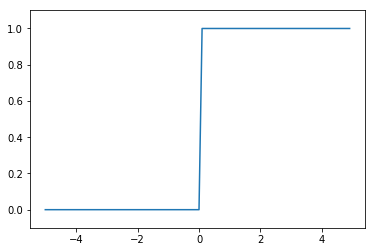

In [29]:
x = np.arange(-5.0, 5.0, 0.1)
# 기존엔 np.arange([-5.0, 5.0, 0.1])로 했으나 [] 없이 사용 가능하게 변함
y = step_function(x)
plt.ylim(-0.1, 1.1)
plt.plot(x, y)
plt.show()

## 시그모이드 함수

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [38]:
x = np.array([-5.0, 5.0, 0.1])

In [39]:
sigmoid(x)

array([ 0.00669285,  0.99330715,  0.52497919])

In [42]:
x = np.arange(-5, 5, 0.1)

In [43]:
y = sigmoid(x)

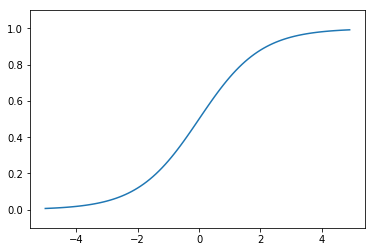

In [44]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 선형 함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어지기에 비선형 함수를 활성화 함수로 사용!
- 선형 함수는 상수배만큼 변하는 함수라, 은닉층이 없는 네트워크로 표현 가능함.

## ReLU 함수
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수

In [45]:
def relu(x):
    return np.maximum(0, x)

# Numpy

In [47]:
a = np.array([1,2,3,4])
print(a)

[1 2 3 4]


In [48]:
np.ndim(a)

1

In [49]:
# 1차원도 튜플임
a.shape

(4,)

In [50]:
a.shape[0]

4

In [51]:
b = np.array([[1,2],[3,4], [5,6]])
print(b)

[[1 2]
 [3 4]
 [5 6]]


In [52]:
np.ndim(b)

2

In [54]:
b.shape

(3, 2)

In [55]:
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])


In [56]:
a.shape

(2, 2)

In [57]:
b.shape

(2, 2)

In [58]:
np.dot(a,b)

array([[19, 22],
       [43, 50]])

In [4]:
def identity_function(x):
    return x

In [5]:
# 3층 신경망
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


In [62]:
# 위의 함수는 출력층에서 항등 함수를 사용했습니다. 이번엔 소프트맥스 함수를 사용해보겠습니다!!

In [63]:
a = np.array([0.3, 2.9, 4.0])

In [64]:
exp_a = np.exp(a)

In [65]:
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [66]:
sum_exp_a = np.sum(exp_a)

In [67]:
print(sum_exp_a)

74.1221542102


In [69]:
y = exp_a / sum_exp_a

In [70]:
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [6]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [7]:
import sys, os
sys.path.append(os.pardir)

In [9]:
from dataset.mnist import load_mnist

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [12]:
print(x_train.shape)

(60000, 784)


In [13]:
print(t_train.shape)

(60000,)


In [14]:
print(x_test.shape)

(10000, 784)


In [15]:
print(t_test.shape)

(10000,)


In [17]:
from PIL import Image

In [18]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [19]:
img = x_train[0]
print(img)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [20]:
label = t_train[0]
print(label)

5


In [21]:
print(img.shape)

(784,)


In [22]:
img = img.reshape(28,28) # 784 -> 28 x 28로 변환

In [23]:
print(img.shape)

(28, 28)


In [24]:
img_show(img)

In [29]:
import pickle

In [30]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('./ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [34]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
#         print(p)
        accuracy_cnt += 1

print("Accuracy:" +str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [35]:
# 데이터를 특정 범위로 변환하는 처리 : 정규화
# 입력 데이터에 특정 변환을 가하는 것 : 전처리

In [36]:
# 배치 : 하나로 묶은 입력 데이터 (x[0], y[0]엔 0번째 이미지와 그 추론 결과가 저장됨)

In [37]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [38]:
x.shape

(10000, 784)

In [39]:
x[0].shape

(784,)

In [40]:
W1.shape

(784, 50)

In [41]:
W2.shape

(50, 100)

In [42]:
W3.shape

(100, 10)

In [47]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p ==t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [51]:
x[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [52]:
x[1:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [53]:
x

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [54]:
p

array([8, 9, 0, 1, 2, 9, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4,
       1, 9, 2, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 0, 6, 3, 5, 9, 9,
       1, 4, 0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7,
       1, 3, 2, 4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 2, 0, 1, 2, 8, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6])

# 4장 신경망 학습

## 4.2 손실 함수 ( loss function ) = 비용 함수 ( cost function )
- 하나의 지표를 기준으로 최적의 매개 변수 값을 탐색하는데, 사용하는 지표를 뜻함
- 일반적으로 평균 제곱 오차 ( MSE ) 와 교차 엔트로피 오차를 사용함

### 평균 제곱 오차 ( Mean Squared Error )

\begin{eqnarray*}
E &=& \frac{1}{2}\ \sum_{k=1} (y_k-t_k)^2\
\end{eqnarray*}

\begin{eqnarray*}
y_k = 신경망의 출력(신경망이 추정한 값),  t_k = 정답 레이블, k는 데이터의 차원 수
\end{eqnarray*}


In [3]:
def mean_squared_error(y, t):
    return 0.5* np.sum((y-t)**2)

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0 ,0]
# 정답은 2

In [10]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 2일 확률이 가장 높다고 추정

In [9]:
np.array(t)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [8]:
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [11]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
# 7일 확률이 가장 높다고 추정

In [12]:
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

첫 번째 추정 결과가 오차가 더 작기에 정답에 더 가까운 것으로 판단 가능

### 교차 엔트로피 오차 ( Cross Entropy Error )

\begin{eqnarray*}
E &=& - \sum_{k=1} t_klogy_k\
\end{eqnarray*}

\begin{eqnarray*}
y_k = 신경망의 출력(신경망이 추정한 값),  t_k = 정답 레이블, k는 데이터의 차원 수
\end{eqnarray*}

교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됩니다

In [14]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))
# delta를 더하는 이유는 np.log() 안에 0을 입력하면 마이너스 무한대가 되어 계산이 진행되지 않기에..!

In [15]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0 ,0]
# 정답은 2

In [16]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 2일 확률이 가장 높다고 추정

In [17]:
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [18]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
# 7일 확률이 가장 높다고 추정

In [19]:
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

### 미니배치
- 훈련 데이터로부터 일부만 골라 학습을 수행. 전체의 근사치로 이용

In [21]:
sys.path.append(os.pardir)

In [22]:
from dataset.mnist import load_mnist

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [24]:
print(x_train.shape)

(60000, 784)


In [25]:
print(t_train.shape)

(60000, 10)


In [26]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [27]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

In [28]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y[np.arange(batch_size), t])) / batch_size

## 왜 손실 함수를 설정하는가?
- 정확도라는 지표를 놔두고 손실 함수의 값을 택하는 이유는?
- '미분' : 가중치 매개변수의 값을 아주 조금 벼노하시켰을 때, 손실 함수가 어떻게 변하나?
- 최적의 매개변수를 탐색할 때 손실 함수의 값을 간으한 작게 하는 매개 변수 값을 찾습니다. 이때 매개변수의 미분을 계산하고 그 미분값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복


### 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문..!

In [29]:
# 중심 차분 ( 중앙 차분 ) : x를 중심으로 그 전후의 차분을 계산

In [31]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [32]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [33]:
x = np.arange(0.0, 20.0, 0.1)

In [34]:
y = function_1(x)

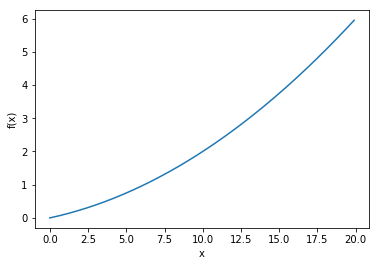

In [35]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [36]:
numerical_diff(function_1, 5)

0.1999999999990898

In [37]:
numerical_diff(function_1, 10)

0.2999999999986347

### 편미분 
- 변수가 여럿인 함수에 대한 미분


In [38]:
def function_2(x):
    return x[0]**2+x[1]**2

### 기울기 ( gradient ) : 모든 변수의 편미분을 벡터로 정리한 것

In [41]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [42]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [45]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [46]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

### 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향!

## 경사하강법
- 현 위치에서 기울어진 방향으로 일정 거리만큼 이동, 그 후 또 기울기를 구해 반복 .. 이렇게 함수의 값을 줄임

In [48]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [49]:
## answer : 경사법으로 f(x0,x1) = x0^2 +x1^2의 최솟값을 구하라

In [50]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [51]:
init_x = np.array([-3.0, 4.0])

In [52]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)


array([ -6.11110793e-10,   8.14814391e-10])

## 학습 알고리즘 구현
- 1단계 ( 미니배치 ) : 훈련 데이터 중 일부를 무작위로 가져옵니다. 이 미니배치의 손실함수 값을 줄이는 것이 목표
- 2단계 ( 기울기 산출 ) : 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시
- 3단계 ( 매개변수 갱신 ) : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
- 4단계 ( 반복 ) : 1-3단계 반복

### 확률적 경사 하강법 ( stochastic gradient descent : SGD )
- 확률적으로 무작위로 골라낸 데이터에 대해 수행

In [56]:
from common.functions import *
from common.gradient import numerical_gradient

In [57]:
# 2층 신경망
class TwoLayerNEt:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y ==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [60]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.two_layer_net import TwoLayerNet


train acc, test acc | 0.112366666667, 0.1135
train acc, test acc | 0.786616666667, 0.7902
train acc, test acc | 0.877383333333, 0.8801
train acc, test acc | 0.899066666667, 0.9031
train acc, test acc | 0.907583333333, 0.9121
train acc, test acc | 0.914733333333, 0.9194
train acc, test acc | 0.920233333333, 0.9223
train acc, test acc | 0.924533333333, 0.9266
train acc, test acc | 0.92855, 0.9302
train acc, test acc | 0.932333333333, 0.9326
train acc, test acc | 0.934966666667, 0.9351
train acc, test acc | 0.93775, 0.9384
train acc, test acc | 0.939316666667, 0.939
train acc, test acc | 0.9418, 0.941
train acc, test acc | 0.943966666667, 0.9422
train acc, test acc | 0.944933333333, 0.9444
train acc, test acc | 0.947366666667, 0.9459


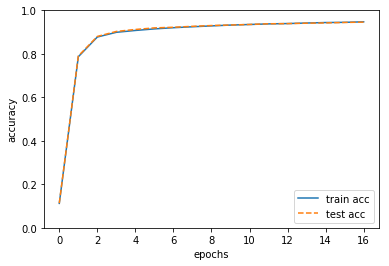

In [61]:

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
